## Problem Statement and Dataset

### *Objective:* To train a machine learning model that can learn from the measurements of an Iris flower and accurately classify them into their respective species.
### *Data:* Iris Flower Dataset with features sepal_length, sepal_width, petal_length, petal_width, species.


## Import necessary Libraries

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

## Load the Dataset

In [4]:
df = pd.read_csv("D:\Yuktha\Codsoft\Task3_Iris_dataset\IRIS.csv")

## Exploratory Data Analysis (EDA)

In [5]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

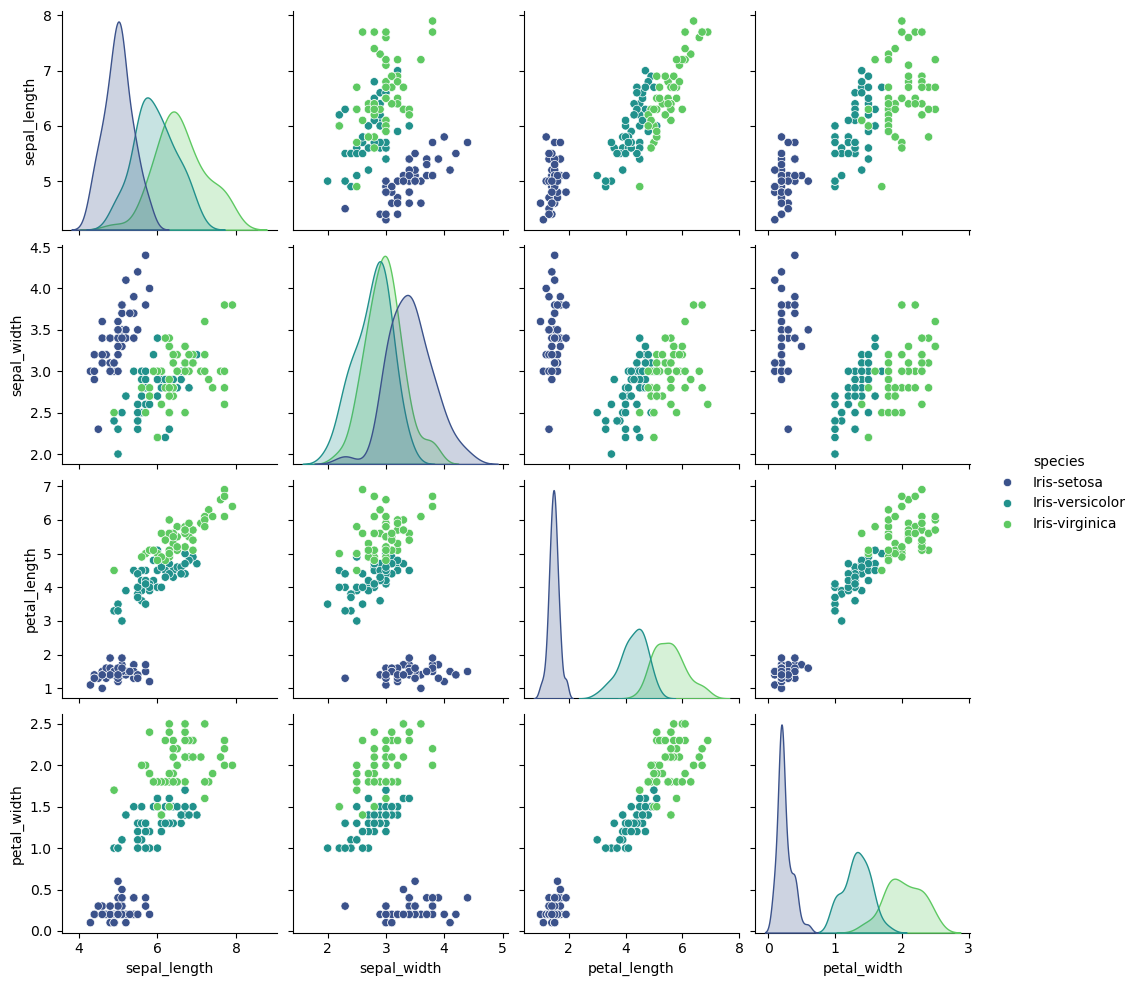

In [9]:
# Convert inf values to NaN only then we can use sns plot
df.replace([np.inf, -np.inf], np.nan, inplace=True)


sns.pairplot(df, hue='species', palette='viridis')
plt.show()

## Data Preprocessing

In [10]:
# Encode Categorical target Variable
label_encoder = LabelEncoder()
df['species'] = label_encoder.fit_transform(df['species'])

## Splitting the data

In [11]:
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Check the distribution of classes in the training and testing sets
print("Training set class distribution:", y_train.value_counts())
print("Testing set class distribution:", y_test.value_counts())

Training set class distribution: species
1    41
0    40
2    39
Name: count, dtype: int64
Testing set class distribution: species
2    11
0    10
1     9
Name: count, dtype: int64


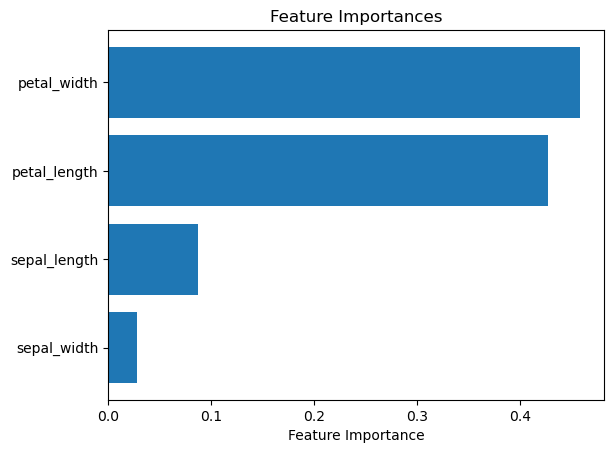

In [13]:
##Feature importance bar chart
model = RandomForestClassifier()
model.fit(X_train, y_train)
importances = model.feature_importances_

features = X.columns
indices = np.argsort(importances)

plt.figure()
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Feature Importance')
plt.show()

## Model Building

In [14]:
# Choosing Support Vector Machines (SVMs) for classification as they are ideal for Iris flower classification due to their capability 
# to find complex decision boundaries with kernel functions. They are also robust to overfitting and work well with small to medium-sized datasets,
#making them suitable for the Iris dataset. 

#SVM classifier with linear kernel
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

## Model Evaluation

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



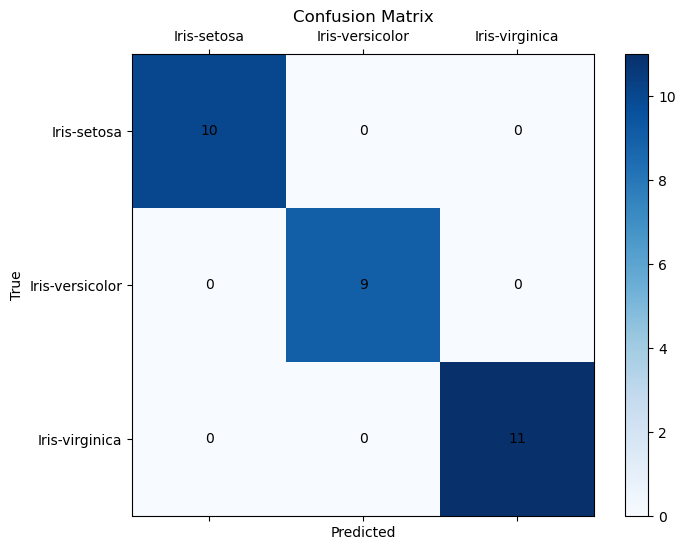

In [15]:
y_pred = svm_classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix with matplotlib
fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(cm, cmap='Blues')

# Add colorbar
fig.colorbar(cax)

# Add labels and title
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_xticks(np.arange(len(label_encoder.classes_)))
ax.set_yticks(np.arange(len(label_encoder.classes_)))
ax.set_xticklabels(label_encoder.classes_)
ax.set_yticklabels(label_encoder.classes_)

# Add text annotations
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black')

plt.title('Confusion Matrix')
plt.show()


Observe that the model is clearly overfitting the data and the distribution of classes could be made uniform

## Approach used to overcome these issues are
>> ## Stratifying the data split, tuning hyperparameters, and using cross-validation, reduces overfitting and ensures a balanced distribution
>> ## of classes in your training and test sets. This will lead to a more reliable and robust model.

## Stratified splitting of data

In [16]:
from sklearn.model_selection import train_test_split

X = df.drop('species', axis=1)
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [17]:
# Check the distribution of classes in the training and testing sets
print("Training set class distribution:", y_train.value_counts())
print("Testing set class distribution:", y_test.value_counts())

Training set class distribution: species
0    40
2    40
1    40
Name: count, dtype: int64
Testing set class distribution: species
0    10
2    10
1    10
Name: count, dtype: int64


## Train the SVM Model with Regularization and Hyperparameter Tuning

In [18]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['linear', 'rbf']}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=0)
grid.fit(X_train, y_train)

print(f"Best parameters: {grid.best_params_}")

# Train the SVM model with the best parameters
best_model = grid.best_estimator_

Best parameters: {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}


## Evaluate the Model

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



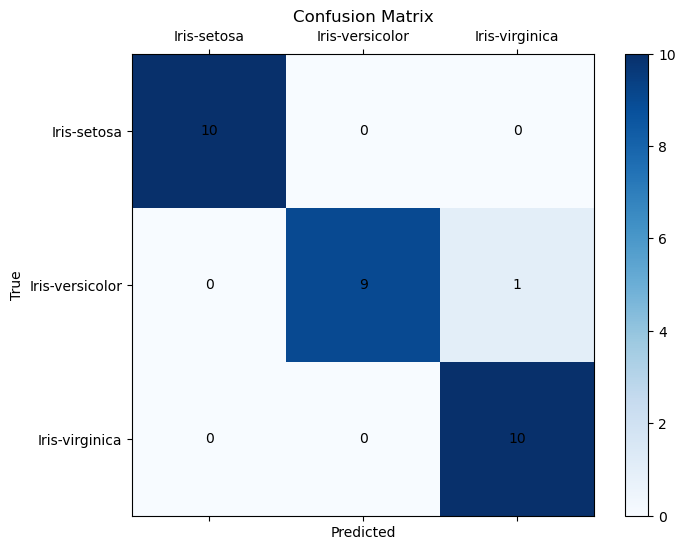

In [19]:
# Predict on the test set
y_pred = grid.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix with matplotlib
fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(cm, cmap='Blues')

# Add colorbar
fig.colorbar(cax)

# Add labels and title
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_xticks(np.arange(len(label_encoder.classes_)))
ax.set_yticks(np.arange(len(label_encoder.classes_)))
ax.set_xticklabels(label_encoder.classes_)
ax.set_yticklabels(label_encoder.classes_)

# Add text annotations
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black')

plt.title('Confusion Matrix')
plt.show()

## Using cross validation for a more reliable model

In [20]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(grid.best_estimator_, X, y, cv=5)
print(f"Cross-validation scores: {scores}")
print(f"Average cross-validation score: {scores.mean()}")

Cross-validation scores: [0.96666667 0.96666667 0.96666667 0.96666667 1.        ]
Average cross-validation score: 0.9733333333333334


## A few data records for iris flower classification

In [23]:
# Define new data records for classification
# New data record (example values for Sepal Length, Sepal Width, Petal Length, Petal Width)
new_data_records = pd.DataFrame({
    'sepal_length': [5.1, 6.5, 7.0, 5.7, 7.0],
    'sepal_width': [3.5, 3.0, 3.2, 3.0, 3.9],
    'petal_length': [1.4, 4.5, 6.1, 4.5, 3.1],
    'petal_width': [0.2, 1.5, 2.3, 1.5, 5.8]
})

# Predict the class for the new records
new_predictions = best_model.predict(new_data_records)

# Convert predictions to original class labels
predicted_classes = label_encoder.inverse_transform(new_predictions)

# Display results
for i, record in enumerate(new_data_records.values):
    print(f"Record {i + 1} ({record}): Predicted class = {predicted_classes[i]}")

Record 1 ([5.1 3.5 1.4 0.2]): Predicted class = Iris-setosa
Record 2 ([6.5 3.  4.5 1.5]): Predicted class = Iris-versicolor
Record 3 ([7.  3.2 6.1 2.3]): Predicted class = Iris-virginica
Record 4 ([5.7 3.  4.5 1.5]): Predicted class = Iris-versicolor
Record 5 ([7.  3.9 3.1 5.8]): Predicted class = Iris-virginica


In [24]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)